In [1]:
import sys
sys.path.append("../")

In [4]:
import time
import torch
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from iml_group_proj.features.bert import combine_bert, get_BERT_features, load_pickle_bert, load_pickle_w2v
from iml_group_proj.evaluation import evaluate_many
from iml_group_proj.features.common.data import load
from iml_group_proj.models.mlp import BASIC_MLP
from iml_group_proj.train_models import train_models
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from transformers import BertModel, BertTokenizer
from sklearn.preprocessing import StandardScaler

In [5]:
classes, train, test = load("../trainTest.pk")
bert_data = load_pickle_bert("../github_data")
w2v_data = load_pickle_w2v("../github_data")
y_train = train["class_name"]
y_test = test["class_name"]

In [42]:
def prep(data):    
    EMP = np.zeros(300)
    X_train_title = np.stack([e.mean(axis=0) if len(e) > 0 else EMP for e in data.train_title_embds])
    X_train_synopsis = np.stack([e.mean(axis=0) if len(e) > 0 else EMP for e in data.train_sypnosis_embds])
    
    return X_train_title, X_train_synopsis

_, bert_synopsis = prep(bert_data)
_, w2v_synopsis = prep(w2v_data)

In [44]:
from sklearn.manifold import TSNE

bert_synopsis_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(bert_synopsis)
w2v_synopsis_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(w2v_synopsis)

/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_67081/328249894.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


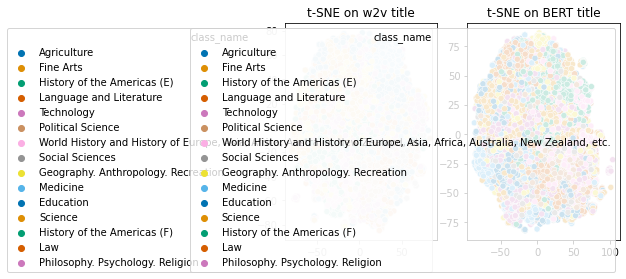

In [80]:
def plot_scatter(data, name, ax):
    sns.scatterplot(
        x=data[:,0], 
        y=data[:,1], 
        hue=y_train, 
        palette="colorblind",
        ax=ax
    ).set_title(name)
    # Put the legend out of the figure
    

fig, ax = plt.subplots(1,2)
plot_scatter(w2v_synopsis_embedded, "t-SNE on w2v title", ax[0])
plot_scatter(bert_synopsis_embedded, "t-SNE on BERT title", ax[1])
fig.show()